<a href="https://colab.research.google.com/github/BrendaMNkhoma/Data-Science-Projects/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#Define file path
file_path = '/content/drive/MyDrive/brenda/brenda_data_cleaned.xlsx'


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel(file_path)

In [ ]:
df.columns=['message','spam']

In [ ]:
df

,message,spam
0,"I am an airtelmoney agent, I have been given y...",1.0
1,Hey its my first Birthday,0.0
2,I am Brenda I have your parcel from Marcus,0.0
3,I am a Transporter from south Africa carrying ...,1.0
4,"You have won an amount of MWK1,000,000 call th...",1.0
...,...,...
3518,U can WIN k100.000 of Music Gift Vouchers ever...,1.0
3519,Congratulations - in this week's competition ...,1.0
3520,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,1.0
3521,"You need to getsleep and, if anything, you nee...",0.0


# Data preprocessing

check for null values

In [ ]:
df.isna().sum()

,0
message,1
spam,1


Fill in with mode

In [ ]:
df = df.apply(lambda col: col.fillna(col.mode()[0]))

check null values again

In [ ]:
df.isna().sum()

,0
message,0
spam,0


Display data types of each column

In [ ]:
print(df.dtypes)

message     object
spam       float64
dtype: object


Fix data type

In [ ]:
df.message=df.message.astype('str')

In [ ]:
df.spam=df.spam.astype('int')

Check again

In [ ]:
print(df.dtypes)

message    object
spam        int64
dtype: object


Check duplication

In [ ]:
df.duplicated().sum()

806

Fix duplication

In [ ]:
df.drop_duplicates(inplace=True)

Check again

In [ ]:
df.duplicated().sum()

0

Check shape

In [ ]:
df.shape

(2717, 2)

<Axes: xlabel='spam', ylabel='count'>

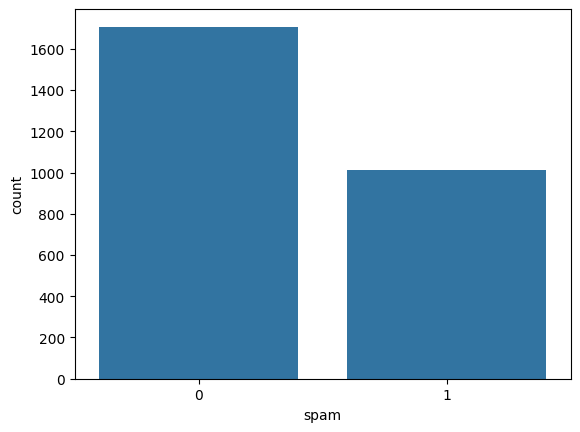

In [ ]:
import seaborn as sns
sns.countplot(x='spam',data=df)

Target classes counts

In [ ]:
df['spam'].value_counts()

,count
spam,
0,1707
1,1010


Over sampling

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Feature engineering

Claculate number of charectors in the message

In [ ]:
df['num_chars']=df['message'].apply(len)

In [ ]:
df.head()

,message,spam,num_chars
0,"I am an airtelmoney agent, I have been given y...",1,139
1,Hey its my first Birthday,0,26
2,I am Brenda I have your parcel from Marcus,0,42
3,I am a Transporter from south Africa carrying ...,1,164
4,"You have won an amount of MWK1,000,000 call th...",1,74


Calculate number of words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,message,spam,num_chars,num_words
0,"I am an airtelmoney agent, I have been given y...",1,139,29
1,Hey its my first Birthday,0,26,5
2,I am Brenda I have your parcel from Marcus,0,42,9
3,I am a Transporter from south Africa carrying ...,1,164,33
4,"You have won an amount of MWK1,000,000 call th...",1,74,13


In [ ]:
df.sample(5)

,message,spam,num_chars,num_words
2542,You are being contacted by our dating service ...,1,141,28
2193,Last Chance! Claim ur Â£150 worth of discount ...,1,155,34
873,25p 4 alfie Moon's Children in need song on ur...,0,162,36
1327,Can i meet at 5.. As 4 where depends on where ...,0,62,17
2312,URGENT! We are trying to contact U. Todays dra...,1,159,32


In [ ]:
df['num_sents']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,message,spam,num_chars,num_words,num_sents
0,"I am an airtelmoney agent, I have been given y...",1,139,29,1
1,Hey its my first Birthday,0,26,5,1
2,I am Brenda I have your parcel from Marcus,0,42,9,1
3,I am a Transporter from south Africa carrying ...,1,164,33,1
4,"You have won an amount of MWK1,000,000 call th...",1,74,13,1


In [ ]:
df.describe()

,spam,num_chars,num_words,num_sents
count,2717.000000,2717.000000,2717.000000,2717.000000
mean,0.371734,96.610968,20.847258,2.197644
std,0.483357,52.847517,10.899420,1.429861
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,45.000000,11.000000,1.000000
50%,0.000000,96.000000,21.000000,2.000000
75%,1.000000,148.000000,30.000000,3.000000
max,1.000000,385.000000,95.000000,12.000000


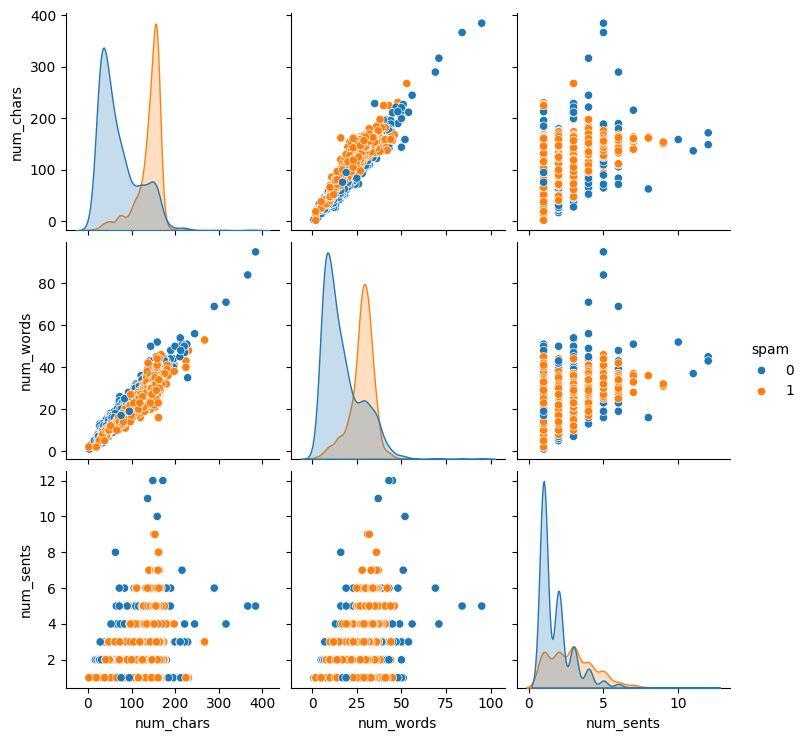

In [ ]:
sns.pairplot(data=df,hue='spam')

In [ ]:
df[['spam','num_sents','num_words','num_chars']].corr()

,spam,num_sents,num_words,num_chars
spam,1.000000,0.370451,0.484898,0.621910
num_sents,0.370451,1.000000,0.598660,0.552692
num_words,0.484898,0.598660,1.000000,0.953004
num_chars,0.621910,0.552692,0.953004,1.000000


<Axes: >

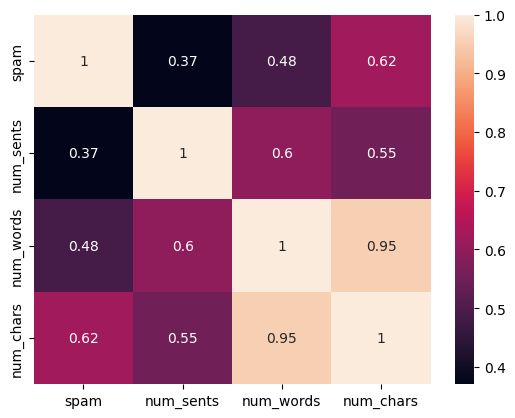

In [ ]:
sns.heatmap(df[['spam','num_sents','num_words','num_chars']].corr(),annot=True)

In [ ]:
data=df[['spam','num_sents','num_words','num_chars']]

Axes(0.125,0.11;0.775x0.77)


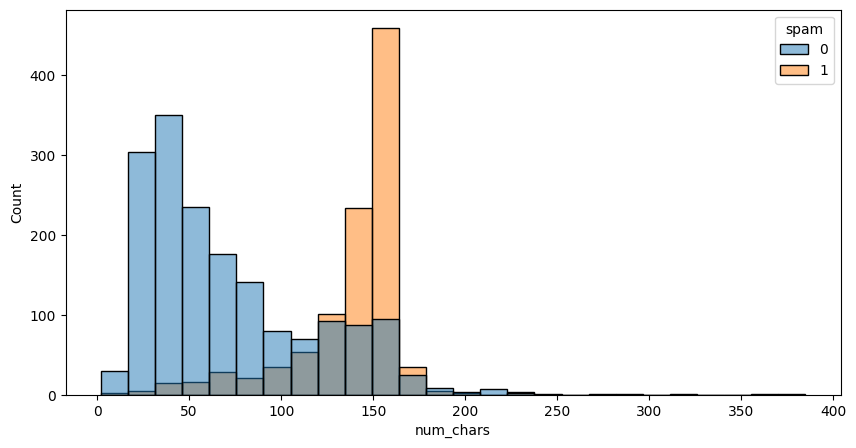

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
print(sns.histplot(x='num_chars',hue='spam',data=data))

Axes(0.125,0.11;0.775x0.77)


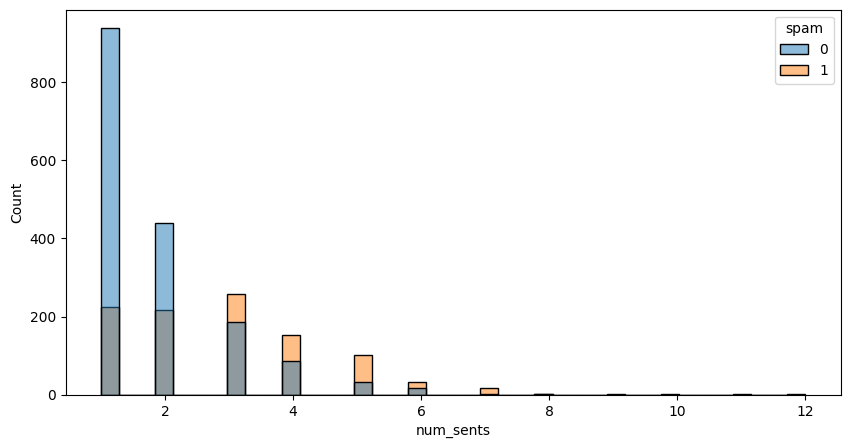

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
print(sns.histplot(x='num_sents',hue='spam',data=data))

Axes(0.125,0.11;0.775x0.77)


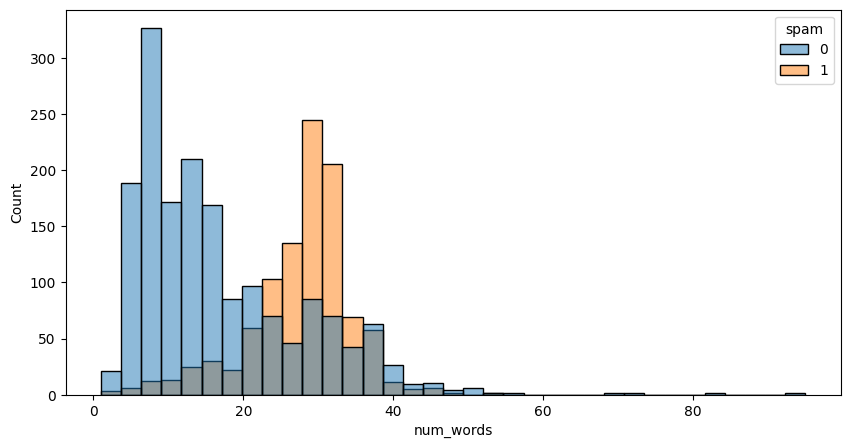

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
print(sns.histplot(x='num_words',hue='spam',data=data))

Stop words

In [ ]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
transform_text('I loved working with ML what about u???')

'love work ml u'

In [ ]:
df['message'].apply(transform_text)

,message
0,airtelmoney agent given money network problem ...
1,hey first birthday
2,brenda parcel marcu
3,transport south africa carri good given rel ar...
4,amount call number 088473885 claim
...,...
3516,winner special select receiv cash award speak ...
3518,u win music gift voucher everi week start txt ...
3519,congratul week competit draw u k145000 prize c...
3521,need getsleep anyth need b studdi ear train


In [ ]:
df['message1']=df['message'].apply(transform_text)

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
from wordcloud import WordCloud

In [ ]:
df

,message,spam,num_chars,num_words,num_sents,message1
0,"I am an airtelmoney agent, I have been given y...",1,139,29,1,airtelmoney agent given money network problem ...
1,Hey its my first Birthday,0,26,5,1,hey first birthday
2,I am Brenda I have your parcel from Marcus,0,42,9,1,brenda parcel marcu
3,I am a Transporter from south Africa carrying ...,1,164,33,1,transport south africa carri good given rel ar...
4,"You have won an amount of MWK1,000,000 call th...",1,74,13,1,amount call number 088473885 claim
...,...,...,...,...,...,...
3516,You are a winner you have been specially selec...,1,164,30,3,winner special select receiv cash award speak ...
3518,U can WIN k100.000 of Music Gift Vouchers ever...,1,147,27,2,u win music gift voucher everi week start txt ...
3519,Congratulations - in this week's competition ...,1,157,29,3,congratul week competit draw u k145000 prize c...
3521,"You need to getsleep and, if anything, you nee...",0,76,17,1,need getsleep anyth need b studdi ear train


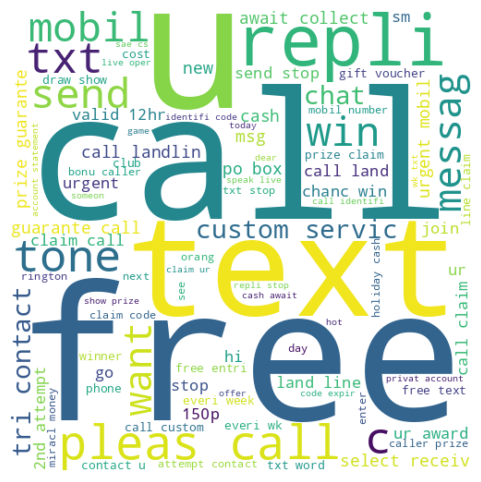

In [ ]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_spam = wc.generate(df[df['spam'] == 1]['message1'].str.cat(sep=' '))

# Plot the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df[df['spam']==0]['message1'].tolist()

['hey first birthday',
 'brenda parcel marcu',
 'hie dear miss',
 'hi tri call reachabl request call back pleas thank',
 'hi want hear thought hpv viru caus cervic safe space share',
 'want hear opinion cervic cancer call hpv readi',
 'registr special citizenship mop start district regist get readi regist arriv center near',
 'transid receiv 0995399865 brian nyamali balanc mk',
 'transid receiv 8220299 lyness mk54500 cash free',
 'call 321 toll free month get messag chang life call 321 toll free',
 'safe sex prevent contract hiv sexual transmit diseas call 321 free learn protect',
 'still opportun call 321 free listen variou messag import',
 'report fraudul activ exam nearest polic station protect futur',
 'oh k watch',
 'eh u rememb 2 spell name ye naughti make wet',
 'fine way u feel that way got',
 'serious spell name',
 'iam go tri 2 month ha ha joke',
 'pay first lalf da stock come',
 'finish lunch go straight turn left u finish ur lunch alreadi',
 'alright way meet sooner',
 'bac

In [ ]:
spam=[]
for msg in df[df['spam']==0]['message1'].tolist():
    for word in msg.split():
        spam.append(word)

In [ ]:
from collections import Counter
import pandas as pd
pd.DataFrame(Counter(spam).most_common(30))

,0,1
0,u,326
1,go,154
2,get,126
3,2,105
4,call,100
5,come,98
6,got,94
7,ok,91
8,know,90
9,like,86


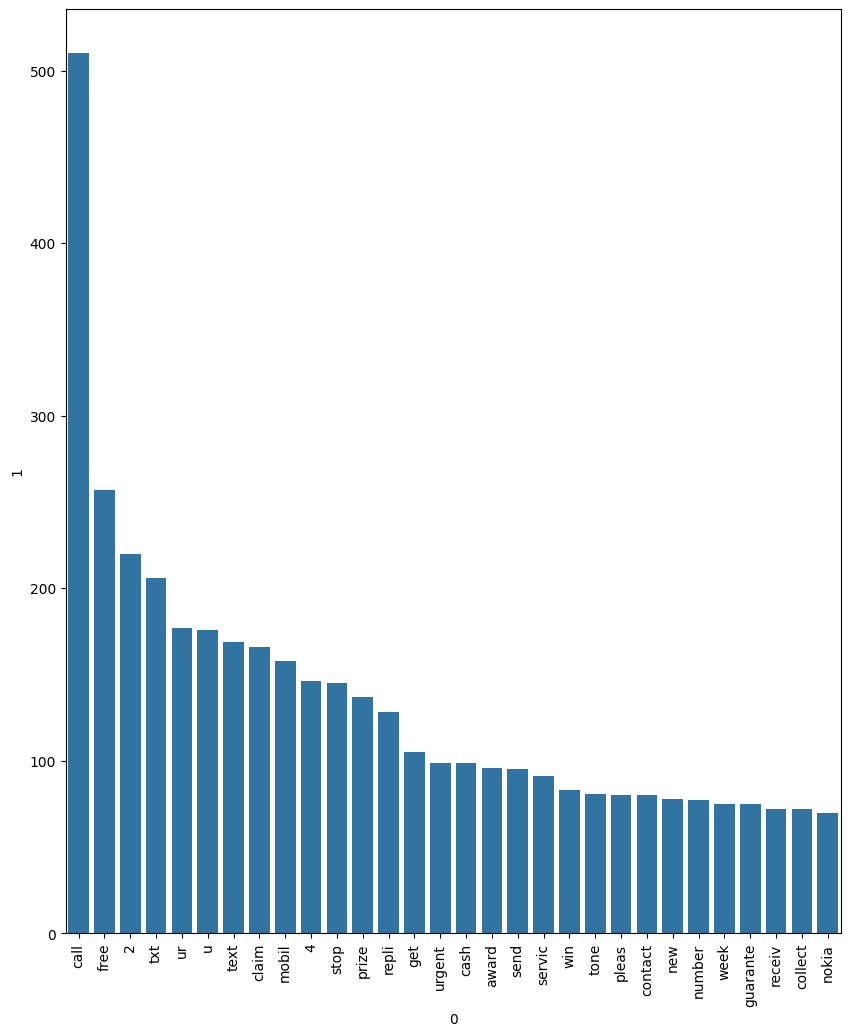

In [ ]:
spam = df[df['spam'] == 1]['message1'].str.cat(sep=' ').split()

# Get the 30 most common words
most_common_spam = pd.DataFrame(Counter(spam).most_common(30))

# Create the plot
plt.figure(figsize=(10, 12))
sns.barplot(x=most_common_spam[0], y=most_common_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
sns.barplot?

In [ ]:
ham=[]
for msg in df[df['spam']==1]['message1'].tolist():
    for word in msg.split():
        ham.append(word)

In [ ]:
from collections import Counter
print("Ham:",Counter(ham))

Ham: Counter({'call': 510, 'free': 257, '2': 220, 'txt': 206, 'ur': 177, 'u': 176, 'text': 169, 'claim': 166, 'mobil': 158, '4': 146, 'stop': 145, 'prize': 137, 'repli': 128, 'get': 105, 'urgent': 99, 'cash': 99, 'award': 96, 'send': 95, 'servic': 91, 'win': 83, 'tone': 81, 'pleas': 80, 'contact': 80, 'new': 78, 'number': 77, 'week': 75, 'guarante': 75, 'receiv': 72, 'collect': 72, 'nokia': 70, 'phone': 69, 'c': 67, 'custom': 64, 'draw': 60, 'today': 58, '150ppm': 57, 'cs': 57, 'want': 56, 'per': 55, 'messag': 54, 'min': 54, 'chat': 52, 'voucher': 51, 'tri': 50, 'line': 50, 'offer': 48, 'go': 48, 'select': 47, 'landlin': 47, 'everi': 46, 'holiday': 45, 'msg': 44, 'show': 44, 'box': 44, 'join': 43, 'money': 42, '1': 41, 'await': 41, 'chanc': 40, 'network': 39, 'po': 39, 'cost': 38, 'rate': 38, 'live': 38, 'code': 38, 'latest': 38, 'end': 38, 'day': 37, 'rington': 37, 'know': 36, 'weekli': 36, 'word': 36, 'entri': 35, 'valid': 35, 'video': 35, 'sm': 34, 'sae': 34, 'attempt': 34, 'appli':

In [ ]:
pd.DataFrame(Counter(ham).most_common(30))

,0,1
0,call,510
1,free,257
2,2,220
3,txt,206
4,ur,177
5,u,176
6,text,169
7,claim,166
8,mobil,158
9,4,146


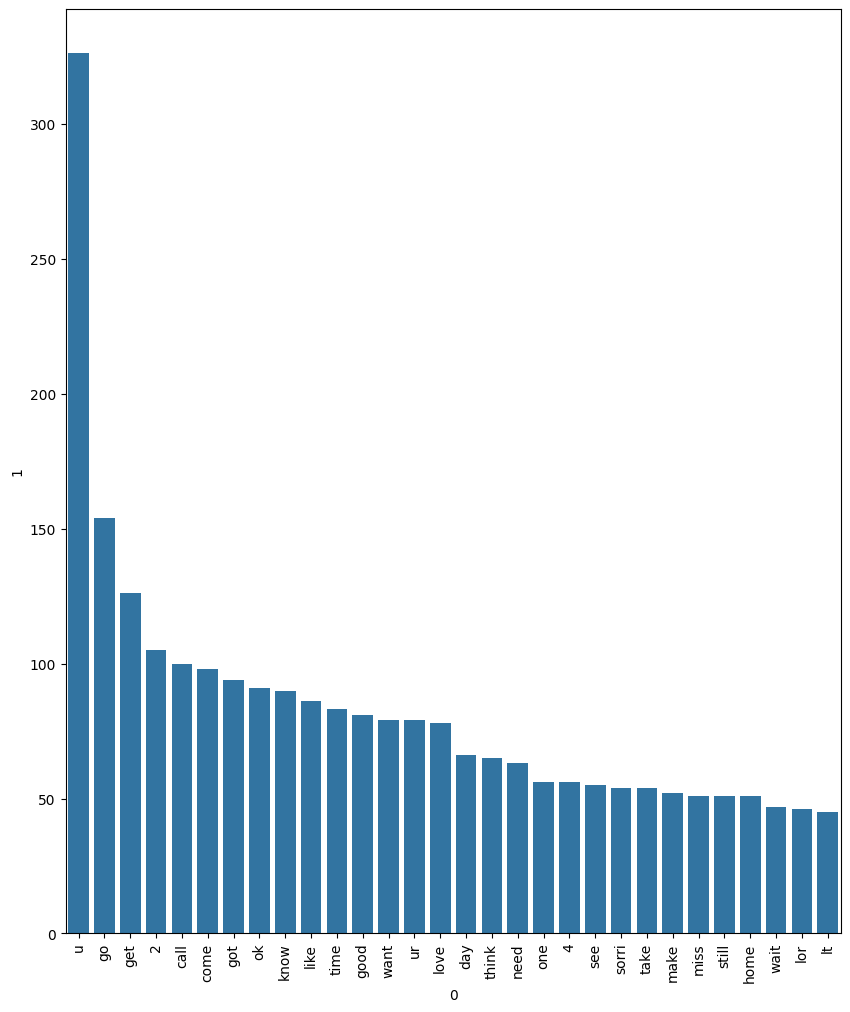

In [ ]:
ham = df[df['spam'] == 0]['message1'].str.cat(sep=' ').split()

# Get the 30 most common words
most_common_ham = pd.DataFrame(Counter(ham).most_common(30))

# Create the plot
plt.figure(figsize=(10, 12))
sns.barplot(x=most_common_ham[0], y=most_common_ham[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,message,spam,num_chars,num_words,num_sents,message1
0,"I am an airtelmoney agent, I have been given y...",1,139,29,1,airtelmoney agent given money network problem ...
1,Hey its my first Birthday,0,26,5,1,hey first birthday
2,I am Brenda I have your parcel from Marcus,0,42,9,1,brenda parcel marcu
3,I am a Transporter from south Africa carrying ...,1,164,33,1,transport south africa carri good given rel ar...
4,"You have won an amount of MWK1,000,000 call th...",1,74,13,1,amount call number 088473885 claim


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df['message1']).toarray()
cv= CountVectorizer()
x1=cv.fit_transform(df['message1']).toarray()

In [ ]:
print("tfidf:",tfidf.idf_)
print("x1:",x1)

tfidf: [7.52135723 7.52135723 8.21450441 ... 8.21450441 5.77215738 6.13506287]
x1: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y=df['spam'].values

In [ ]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred4=gnb.predict(x_test)

In [ ]:
gnb.classes_

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, ConfusionMatrixDisplay

In [ ]:
accuracy_score(y_test,y_pred4)

0.8253676470588235

In [ ]:
precision_score(y_test,y_pred4)

0.7211155378486056

In [ ]:
matrix =confusion_matrix(y_test,y_pred4)

In [ ]:
mnb.fit(x_train,y_train)
mnb.fit(x_train1,y_train1)

MultinomialNB()

In [ ]:
y_pred2=mnb.predict(x_test)
y_pred22=mnb.predict(x_test1)

In [ ]:
import matplotlib.pyplot as plt

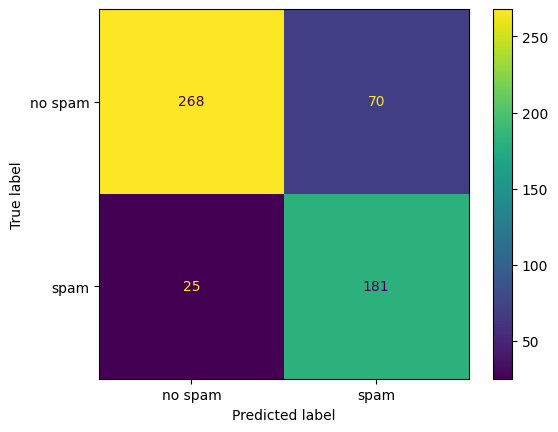

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['no spam','spam'])
display.plot()
plt.show()

In [ ]:
print("tf:",accuracy_score(y_test,y_pred2))
print("cv:",accuracy_score(y_test1,y_pred22))

tf: 0.9375
cv: 0.9319852941176471


In [ ]:
print("p_tf:",precision_score(y_test,y_pred2))
print("p_cv:",precision_score(y_test1,y_pred22))

p_tf: 0.9479166666666666
p_cv: 0.9043062200956937


In [ ]:
print("tf:",confusion_matrix(y_test,y_pred2))
print("cv:",confusion_matrix(y_test1,y_pred22))

tf: [[328  10]
 [ 24 182]]
cv: [[318  20]
 [ 17 189]]


In [ ]:
bnb.fit(x_train,y_train)
bnb.fit(x_train1,y_train1)

BernoulliNB()

In [ ]:
y_pred3=bnb.predict(x_test)
y_pred33=bnb.predict(x_test1)

In [ ]:
print("tf:",accuracy_score(y_test,y_pred3))
print("cv:",accuracy_score(y_test1,y_pred33))

tf: 0.9227941176470589
cv: 0.9227941176470589


In [ ]:
print("tf:",precision_score(y_test,y_pred3))
print("cv:",precision_score(y_test1,y_pred33))

tf: 0.9659090909090909
cv: 0.9659090909090909


In [ ]:
print("tf:",confusion_matrix(y_test,y_pred3))
print("cv:",confusion_matrix(y_test1,y_pred33))

tf: [[332   6]
 [ 36 170]]
cv: [[332   6]
 [ 36 170]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb=MultinomialNB()
ETC=ExtraTreesClassifier(n_estimators=50,random_state=2)
rf=RandomForestClassifier(n_estimators=50,random_state=2)
lg=LogisticRegression(solver='liblinear',penalty='l1')

In [ ]:
def classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    matrix =confusion_matrix(y_test,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['no spam','spam'])
    display.plot()
    plt.show()
    return accuracy,precision

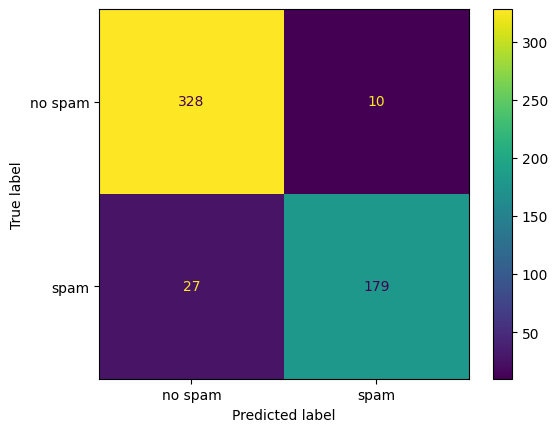

(0.9319852941176471, 0.9470899470899471)

In [ ]:
classifier(svc,x_train,x_test,y_train,y_test)

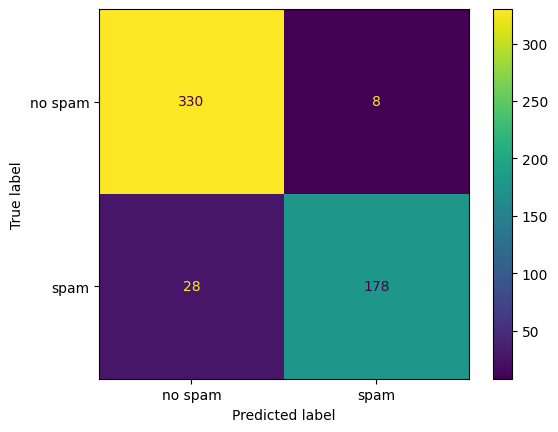

(0.9338235294117647, 0.956989247311828)

In [ ]:
classifier(mnb,x_train,x_test,y_train,y_test)

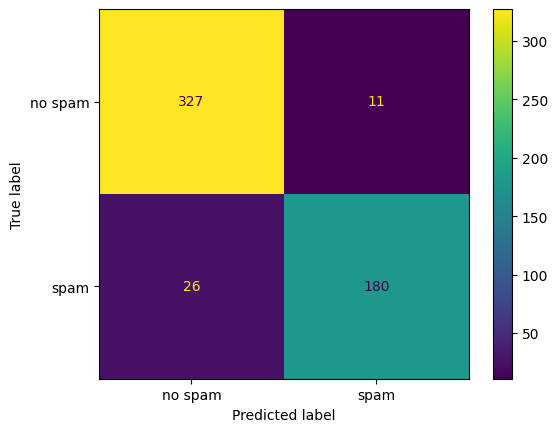

(0.9319852941176471, 0.9424083769633508)

In [ ]:
classifier(ETC,x_train,x_test,y_train,y_test)

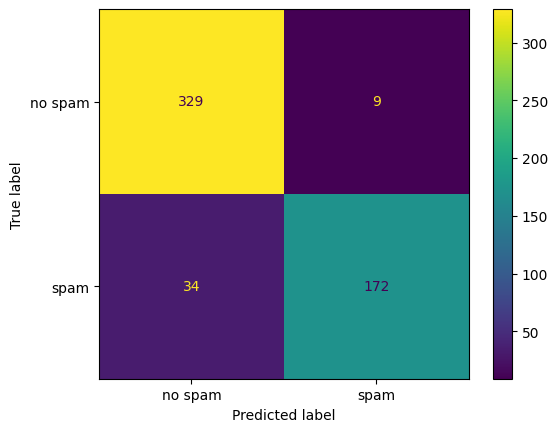

(0.9209558823529411, 0.9502762430939227)

In [ ]:
classifier(rf,x_train,x_test,y_train,y_test)

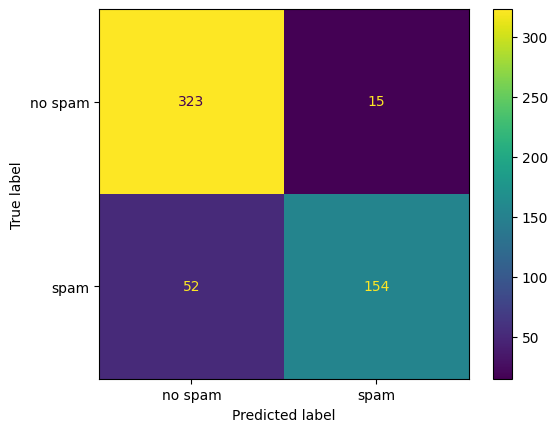

(0.8768382352941176, 0.9112426035502958)

In [ ]:
classifier(lg,x_train,x_test,y_train,y_test)

In [ ]:
import joblib
joblib.dump(tfidf,open('vectorizer.pkl','wb'))
joblib.dump(rf,open('model.jpl','wb'))